# About The Dataset


### Dataset Description

This dataset pertains to Happy Customer Bank and its cross-selling strategy for credit cards to existing customers. The bank aims to identify customers with a higher likelihood of taking a recommended credit card. Various customer demographics, account details, and engagement metrics are included to support targeted marketing.

### Dataset Structure

The dataset includes the following columns:

1-ID: A unique identifier for each customer, used for record tracking.

2-Gender: The customer’s gender, either "Male" or "Female".

3-Age: The age of the customer in years, a factor that can influence credit card eligibility and marketing appeal.

4-Occupation: The customer’s occupation, categorized as "Salaried," "Self_Employed," or "Other." Different occupations may 
correlate with different financial behaviors.

5-Vintage: The number of months since the customer opened their account, indicating their tenure with the bank.

6-Credit_Product: Indicates if the customer already has a credit product with the bank ("Yes" or "No"). This can impact the 
likelihood of a customer adopting a new credit card.

7-Avg_Account_Balance: The average account balance of the customer, which serves as an indicator of financial stability.

8-Is_Active: Shows if the customer has been actively using their account (Yes/No).

9-Is_Lead: The target variable, where 1 represents customers who are likely to show interest in a credit card, and 0 
represents those who are not.

This structure provides a robust foundation for identifying customers who may respond favorably to credit card offers, allowing for segmentation based on demographics, behavior, and product engagement

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , recall_score , precision_score, make_scorer, f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [134]:
dataset = pd.read_csv('Credit Card Data.csv')

In [135]:
dataset

,ID,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,Other,43.0,No,1045696,No,0
1,IDD62UNG,Female,30,Salaried,32.0,No,581988,No,0
2,HD3DSEMC,Female,56,Self_Employed,26.0,No,1484315,Yes,0
3,BF3NC7KV,Male,34,Salaried,19.0,No,470454,No,0
4,TEASRWXV,Female,30,Salaried,33.0,No,886787,No,0
...,...,...,...,...,...,...,...,...,...
31324,B4X7R4MP,Male,42,Self_Employed,19.0,No,230385,No,0
31325,ZNHVHDQM,Female,42,Other,13.0,NaN,1346222,No,1
31326,KEXT9UB8,Male,58,Self_Employed,105.0,Yes,4794608,No,0
31327,JX6GZRMY,Male,29,Salaried,13.0,No,1632616,No,1


# EDA

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31329 entries, 0 to 31328
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   31329 non-null  object 
 1   Gender               31329 non-null  object 
 2   Age                  31329 non-null  int64  
 3   Occupation           31329 non-null  object 
 4   Vintage              31146 non-null  float64
 5   Credit_Product       27559 non-null  object 
 6   Avg_Account_Balance  31329 non-null  int64  
 7   Is_Active            31329 non-null  object 
 8   Is_Lead              31329 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.2+ MB


In [137]:
dataset.head()

,ID,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,Other,43.0,No,1045696,No,0
1,IDD62UNG,Female,30,Salaried,32.0,No,581988,No,0
2,HD3DSEMC,Female,56,Self_Employed,26.0,No,1484315,Yes,0
3,BF3NC7KV,Male,34,Salaried,19.0,No,470454,No,0
4,TEASRWXV,Female,30,Salaried,33.0,No,886787,No,0


In [138]:
data = dataset.drop(columns=['ID'])

In [139]:
data

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,43.0,No,1045696,No,0
1,Female,30,Salaried,32.0,No,581988,No,0
2,Female,56,Self_Employed,26.0,No,1484315,Yes,0
3,Male,34,Salaried,19.0,No,470454,No,0
4,Female,30,Salaried,33.0,No,886787,No,0
...,...,...,...,...,...,...,...,...
31324,Male,42,Self_Employed,19.0,No,230385,No,0
31325,Female,42,Other,13.0,NaN,1346222,No,1
31326,Male,58,Self_Employed,105.0,Yes,4794608,No,0
31327,Male,29,Salaried,13.0,No,1632616,No,1


In [140]:
# Handle missing values in 'Vintage' and 'Credit_Product'

# Impute 'Vintage' with the median value
data['Vintage'].fillna(data['Vintage'].median(), inplace=True)

# For 'Credit_Product', we'll create a new category 'Unknown' for missing values
data['Credit_Product'].fillna('Unknown', inplace=True)

# Verify if there are any missing values left
missing_values_after = data.isnull().sum()

missing_values_after

Gender                 0
Age                    0
Occupation             0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

### Univariate Analysis

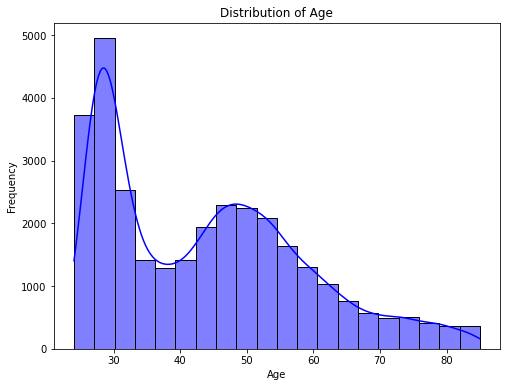

In [141]:
# Question 1: What is the distribution of Age?
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [142]:
# The Age distribution is likely unimodal, with most values concentrated around a specific range (25–45 years), 
### depending on the dataset.

# Since the distribution is right-skewed it indicates younger customers dominate. 

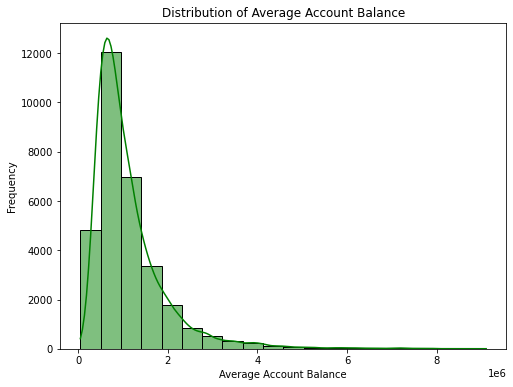

In [143]:
# Question 2: What is the distribution of Average Account Balance?
plt.figure(figsize=(8, 6))
sns.histplot(data['Avg_Account_Balance'], kde=True, bins=20, color='green')
plt.title('Distribution of Average Account Balance')
plt.xlabel('Average Account Balance')
plt.ylabel('Frequency')
plt.show()

In [144]:
# Avg_Account_Balance might show significant right-skewness, meaning most customers 
# have a low balance while a few have very high balances.

### Bivariate Analysis

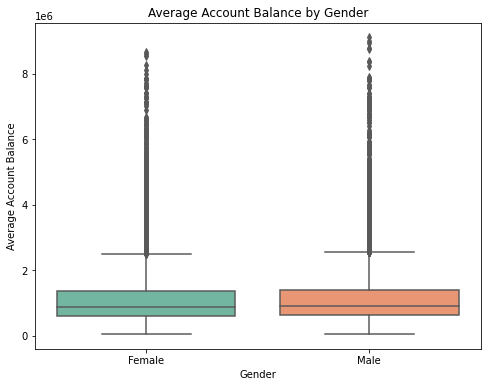

In [145]:
# Question 3: How does Avg_Account_Balance vary by Gender?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Avg_Account_Balance', data=data, palette='Set2')
plt.title('Average Account Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Account Balance')
plt.show()

In [146]:
#Suggested no drastic difference between male and female account balances, with subtle variability.
#Outliers are visible for both genders, especially on the higher end of the balance.

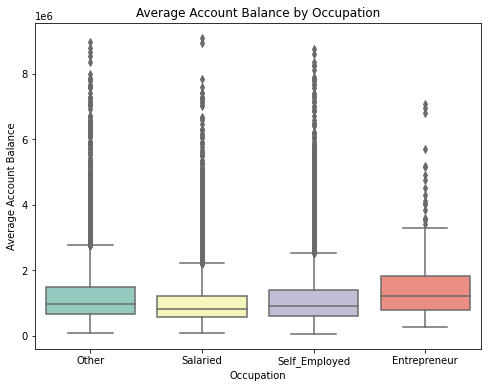

In [147]:
# Question 4: How does Avg_Account_Balance vary by Occupation?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Avg_Account_Balance', data=data, palette='Set3')
plt.title('Average Account Balance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Account Balance')
plt.show()

In [148]:
#Entrepreneurs tend to have both a higher median and a wider range of balances compared to salaried 
#and self-employed individuals.
#Self_Employed and Other categories have larger spreads and more outliers, suggesting variability in income
#or account behavior in these groups.
# Occupation is likely linked to income levels and financial behavior, making it an important factor 
# to consider when targeting leads

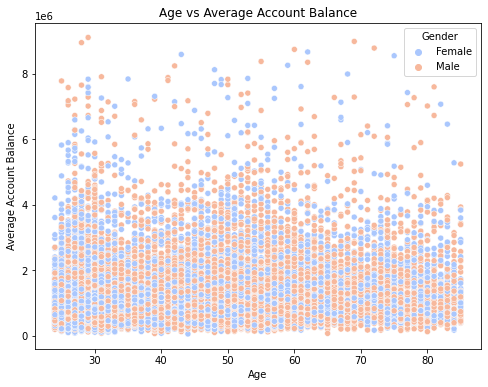

In [149]:
# Question 5: What is the relationship between Age and Avg_Account_Balance?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Avg_Account_Balance', data=data, hue='Gender', palette='coolwarm')
plt.title('Age vs Average Account Balance')
plt.xlabel('Age')
plt.ylabel('Average Account Balance')
plt.legend(title='Gender')
plt.show()

In [150]:
#The scatterplot suggests a positive correlation between
#age and account balance—older customers tend to have higher balances.

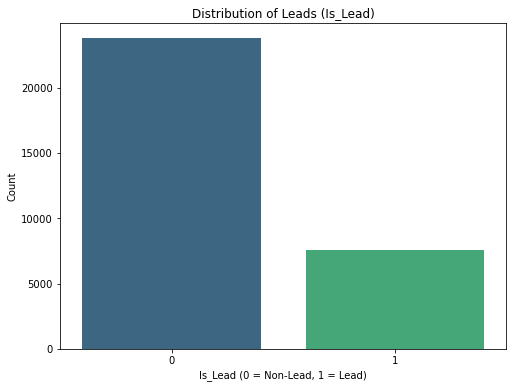

In [151]:
#Analyze the distribution of the target variable

plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Lead', data=data, palette='viridis')
plt.title('Distribution of Leads (Is_Lead)')
plt.xlabel('Is_Lead (0 = Non-Lead, 1 = Lead)')
plt.ylabel('Count')
plt.show()

In [152]:
#The target variable (Is_Lead) is highly imbalanced, with significantly more non-leads (0) than leads (1).
#Accuracy is not a reliable metric for imbalanced data. Metrics like Precision, Recall, F1-Score are better suited
#to evaluate performance.

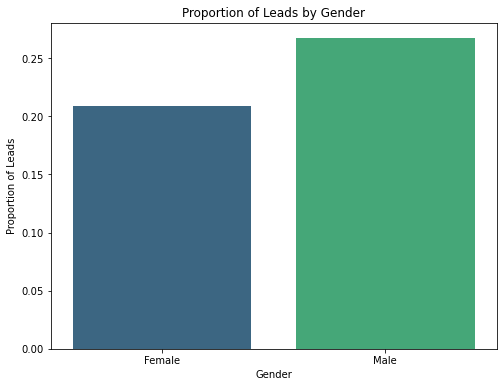

In [153]:
#Explore the relationship between Gender and Is_Lead
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Is_Lead', data=data, ci=None, palette='viridis')
plt.title('Proportion of Leads by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Leads')
plt.show()

In [185]:
#Males seems to dominate the lead conversions

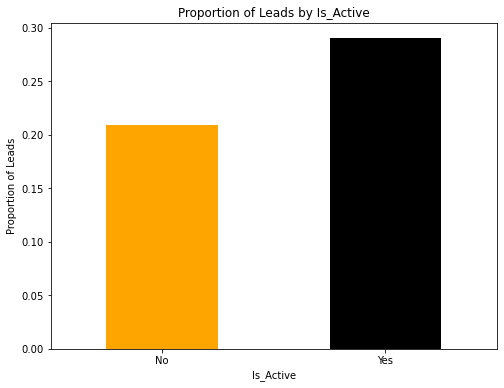

In [190]:
# Calculate the proportion of leads by Is_Active
lead_proportion = data.groupby('Is_Active')['Is_Lead'].mean()

# Plot the proportion of leads
plt.figure(figsize=(8, 6))
lead_proportion.plot(kind='bar', color=['orange', 'black'])
plt.title('Proportion of Leads by Is_Active')
plt.xlabel('Is_Active')
plt.ylabel('Proportion of Leads')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()


In [193]:
# The proportion of leads is lower for inactive customers.
# This suggests that inactive customers are less likely to express interest in credit card products
#The clear difference suggests that customer activity is a strong indicator for predicting leads

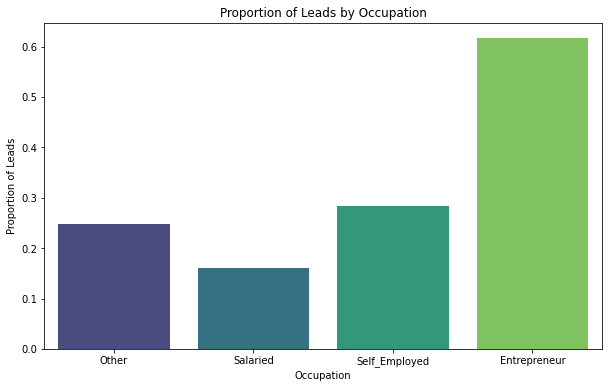

In [194]:
#Explore the relationship between Occupation and Is_Lead

plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Is_Lead', data=data, ci=None, palette='viridis')
plt.title('Proportion of Leads by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Leads')
plt.show()

In [195]:
# Entrepreneurs stand out as the occupation category with the highest proportion of leads (above 60%).
# This suggests that entrepreneurs are highly interested in the financial product or service being offered.

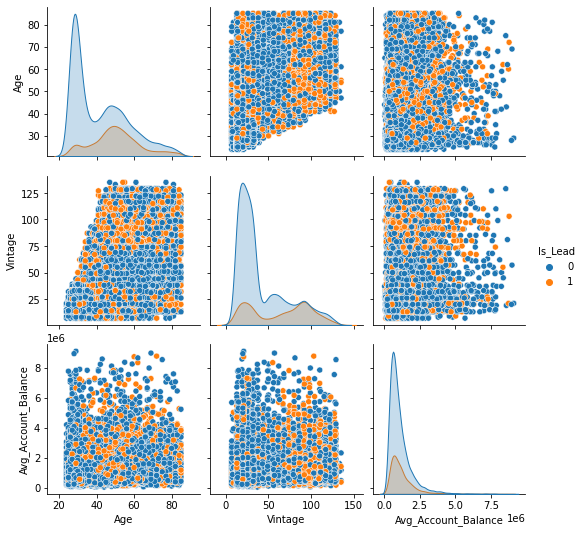

In [196]:
sns.pairplot(data , hue = 'Is_Lead')

In [197]:
# The pairplot reveals some separability between Is_Lead = 0 and Is_Lead = 1 based on features like Age 
# and Avg_Account_Balance. However, there’s also overlap, indicating some noise in the data.

In [198]:
data['Is_Lead'].value_counts()

0    23789
1     7540
Name: Is_Lead, dtype: int64

In [199]:
data['Credit_Product'].nunique()

3

In [200]:
data['Occupation'].nunique()

4

In [201]:
#Preprocessing and Encoding
# Separate features and target
le = LabelEncoder()
x = data.drop(['Is_Lead'] , axis = 1 )
y = data['Is_Lead']

transformer = ColumnTransformer(transformers=[
    ('ohe' , OneHotEncoder(sparse=False , drop = 'first'), ['Occupation']),
    ( 'be' , BinaryEncoder() , ['Credit_Product'])
] , remainder='passthrough')

x['Gender'] = le.fit_transform(x['Gender'])
x['Is_Active'] = le.fit_transform(x['Is_Active'])
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Occupation']),
                                ('be', BinaryEncoder(), ['Credit_Product'])])

In [164]:
custom_scorer = make_scorer(precision_score)
sfs = SequentialFeatureSelector(estimator=LogisticRegression() ,n_features_to_select=3,
                                direction='backward' , scoring=custom_scorer)

In [165]:
sfs.fit(transformer.fit_transform(x) , y)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=3,
                          scoring=make_scorer(precision_score))

In [203]:
sfs.get_feature_names_out()

array(['x3', 'x7', 'x9'], dtype=object)

In [170]:
sfs.get_support(indices=True)   #Vintage, #Is_Active #Is_Lead

array([3, 7, 9], dtype=int64)

In [171]:
custom_scorer = make_scorer(recall_score)
sfs = SequentialFeatureSelector(estimator=LogisticRegression() ,n_features_to_select=3,
                                direction='backward' , scoring=custom_scorer)

In [172]:
sfs.fit(transformer.fit_transform(x) , y)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=3,
                          scoring=make_scorer(recall_score))

In [175]:
sfs.get_feature_names_out()

array(['x3', 'x7', 'x9'], dtype=object)

In [176]:
sfs.get_support(indices=True)

array([3, 7, 9], dtype=int64)

In [204]:
models = [
    ( 'lr' , LogisticRegression(multi_class='ovr') ),
    ( 'RFC' , RandomForestClassifier() ),
    ( 'Gradient Boosting' , GradientBoostingClassifier() ),
    ( 'DTC' , DecisionTreeClassifier() )
]

In [205]:
#Since SequentialFeatureSelector only supports one metric, so I used a custom scorer.

custom_scorer = make_scorer(precision_score)

for model in models :
    
    pl = make_pipeline(transformer, StandardScaler() , SequentialFeatureSelector(estimator=LogisticRegression() ,n_features_to_select=3,
                                direction='backward' , scoring=custom_scorer), model[1])
    
    scores = cross_validate(estimator=pl, X = x , y = y ,scoring=['precision', 'recall', 'f1'],
                            cv = 5 , return_train_score=True )
    
    print(model[0])
    print(f"Avg Precision Train score: {scores['train_precision'].mean()}")
    print(f"Avg Precision Test score: {scores['test_precision'].mean()}")
    print(f"Avg Recall Train score: {scores['train_recall'].mean()}")
    print(f"Avg Recall Test score: {scores['test_recall'].mean()}")
    print(f"Avg F1 Train score: {scores['train_f1'].mean()}")
    print(f"Avg F1 Test score: {scores['test_f1'].mean()}")
    print('*'*40)

lr
Avg Precision Train score: 0.8496023385173196
Avg Precision Test score: 0.849601631958936
Avg Recall Train score: 0.4248010610079576
Avg Recall Test score: 0.4248010610079576
Avg F1 Train score: 0.5663939713377082
Avg F1 Test score: 0.5662825236402943
****************************************
RFC
Avg Precision Train score: 0.8336638111166726
Avg Precision Test score: 0.7386231692162711
Avg Recall Train score: 0.5009946949602122
Avg Recall Test score: 0.4453580901856764
Avg F1 Train score: 0.6230085739474398
Avg F1 Test score: 0.5520380084096743
****************************************
Gradient Boosting
Avg Precision Train score: 0.8500126415820637
Avg Precision Test score: 0.8497002222805653
Avg Recall Train score: 0.42523209549071617
Avg Recall Test score: 0.4250663129973475
Avg F1 Train score: 0.5668685757953454
Avg F1 Test score: 0.5665302032864246
****************************************
DTC
Avg Precision Train score: 0.8627936678301211
Avg Precision Test score: 0.748455558739768

#### LR Tuning - Precision

In [206]:
steps = []

steps.append( ( 'transformer', transformer) )
steps.append( ('poly' , PolynomialFeatures()) )
steps.append( ('sclr' , StandardScaler()) )
steps.append( ('lr' ,LogisticRegression(max_iter=5000) ))

lr = Pipeline(steps = steps )
lr

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('poly', PolynomialFeatures()), ('sclr', StandardScaler()),
                ('lr', LogisticRegression(max_iter=5000))])

In [207]:
#Changing the regularization parameter to control the inverse of the regularization strength in logistic regression
#Changing polynomial feature transformer (Poly degree)
lr_params = [
    {
        'lr__C' : [0.01 , 0.1 , 1 , 5 , 10],
        'poly__degree' : [1,2]
    }
]

In [208]:
lr_srch = GridSearchCV(estimator=lr , param_grid=lr_params , scoring='precision' , 
                       cv = 5 , return_train_score=True )

In [209]:
lr_srch.fit(x , y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('sclr', StandardScaler()),
                                       ('lr',
                    

In [210]:
lr_srch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('poly', PolynomialFeatures()), ('sclr', StandardScaler()),
                ('lr', LogisticRegression(C=10, max_iter=5000))])

In [211]:
lr_srch.best_params_

{'lr__C': 10, 'poly__degree': 2}

In [212]:
lr_srch.cv_results_['mean_train_score']

array([0.80070251, 0.79922142, 0.79821206, 0.80476916, 0.797504  ,
       0.806229  , 0.79747161, 0.80670578, 0.79747161, 0.80696132])

In [213]:
lr_srch.cv_results_['mean_test_score']

array([0.80018267, 0.79822097, 0.7970036 , 0.79976828, 0.79647479,
       0.80035296, 0.79657421, 0.80076886, 0.79657421, 0.80092285])

In [214]:
lr_srch.best_score_

0.8009228486452462

In [215]:
#lr recall score Tuning
lr_srch = GridSearchCV(estimator=lr , param_grid=lr_params , scoring='recall' , 
                       cv = 5 , return_train_score=True )
lr_srch.fit(x , y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('sclr', StandardScaler()),
                                       ('lr',
                    

In [53]:
lr_srch.best_params_

{'lr__C': 5, 'poly__degree': 2}

In [54]:
lr_srch.cv_results_['mean_train_score']

array([0.48451592, 0.52221485, 0.49104775, 0.52877984, 0.49164456,
       0.52834881, 0.49167772, 0.52828249, 0.49167772, 0.52818302])

In [55]:
lr_srch.best_score_

0.5277188328912467

#### DTC Tuning - Precision

In [216]:
steps = []

steps.append( ( 'transformer', transformer) )
steps.append( ('sclr' , StandardScaler()) )
steps.append( ('DTC' , DecisionTreeClassifier() ))

DTC = Pipeline(steps = steps )
DTC

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()), ('DTC', DecisionTreeClassifier())])

In [217]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [218]:
#measuring the quality of a split in the decision tree, decision tree splits, and also the maximum depth of the tree

# gini: The Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified. 
##It’s the default criterion in scikit-learn.
# entropy: The entropy criterion uses information gain, which is based on the entropy of the data. It measures the impurity
###of a split based on information theory.
# log_loss: This is a newer option, which uses logistic loss to determine the best splits. It’s often
##used in probabilistic settings and may perform better in some cases.
dt_params = [
    {
        'DTC__criterion' : ["gini", "entropy", "log_loss"],
        'DTC__splitter' : ["best", "random"],
        'DTC__max_depth' : list(range(1 , 11))
    }
]

In [117]:
dt_srch = GridSearchCV(estimator=DTC , param_grid=dt_params , scoring='precision' , 
                       cv = 5 , return_train_score=True )

In [118]:
dt_srch.fit(x , y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid=[{'DTC__criterion': ['gini', 'entropy

In [119]:
dt_srch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [120]:
dt_srch.best_score_

0.856693289591397

In [61]:
#DT Recall Score Tuning
dt_srch = GridSearchCV(estimator=DTC , param_grid=dt_params , scoring='recall' , 
                       cv = 5 , return_train_score=True )
dt_srch.fit(x , y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid=[{'DTC__criterion': ['gini', 'entropy

In [62]:
dt_srch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7))])

In [63]:
dt_srch.best_score_

0.5712201591511936

#### GBC Tuning - Precision

In [64]:
steps = []
steps.append(('transformer', transformer))
steps.append(('sclr', StandardScaler()))
steps.append(('GBC', GradientBoostingClassifier()))

GBC = Pipeline(steps=steps)

In [65]:
gbc_params = {
    'GBC__n_estimators': [50, 100],  # Number of boosting stages to be run
    'GBC__learning_rate': [0.05, 0.1],  # Step size shrinkage used in update to prevent overfitting
    'GBC__max_depth': [3, 5],  # Maximum depth of the individual trees
}

In [126]:
gbc_search = GridSearchCV(estimator=GBC, param_grid=gbc_params, scoring='precision', cv=5, return_train_score=True)

gbc_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('GBC', GradientBoostingClassifier())]),
             param_grid={'GBC__learning_rate': [0.05, 0.1

In [127]:
gbc_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('GBC',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=50))])

In [128]:
gbc_search.best_score_

0.8417112921209016

In [66]:
#GBC Recall Score Tuning
gbc_search = GridSearchCV(estimator=GBC, param_grid=gbc_params, scoring='recall', cv=5, return_train_score=True)

gbc_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('GBC', GradientBoostingClassifier())]),
             param_grid={'GBC__learning_rate': [0.05, 0.1

In [67]:
gbc_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('GBC', GradientBoostingClassifier(max_depth=5))])

In [68]:
gbc_search.best_score_

0.5596816976127321

#### RFC Tuning - Precision

In [219]:
steps = []
steps.append(('transformer', transformer))
steps.append(('sclr', StandardScaler()))
steps.append(('RFC', RandomForestClassifier()))

RFC = Pipeline(steps=steps)

In [220]:
rfc_params = {
    'RFC__n_estimators': [50, 100],  # Number of trees in the forest
    'RFC__max_depth': [3, 5],  # Maximum depth of the tree
    'RFC__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
}

In [222]:
rfc_search = GridSearchCV(estimator=RFC, param_grid=rfc_params, scoring='precision', cv=5, return_train_score=True)

rfc_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('RFC', RandomForestClassifier())]),
             param_grid={'RFC__max_depth': [3, 5],
          

In [138]:
rfc_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('RFC', RandomForestClassifier(max_depth=3))])

In [139]:
rfc_search.best_score_

0.8550100054405068

In [224]:
#RFC Recall Score Tuning
rfc_search = GridSearchCV(estimator=RFC, param_grid=rfc_params, scoring='recall', cv=5, return_train_score=True)

rfc_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Occupation']),
                                                                        ('be',
                                                                         BinaryEncoder(),
                                                                         ['Credit_Product'])])),
                                       ('sclr', StandardScaler()),
                                       ('RFC', RandomForestClassifier())]),
             param_grid={'RFC__max_depth': [3, 5],
          

In [225]:
rfc_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Occupation']),
                                                 ('be', BinaryEncoder(),
                                                  ['Credit_Product'])])),
                ('sclr', StandardScaler()),
                ('RFC', RandomForestClassifier(max_depth=5, n_estimators=50))])

In [226]:
rfc_search.best_score_

0.4793103448275862

In [229]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from category_encoders import BinaryEncoder

# Load dataset
def load_data():
    data = pd.read_csv('Credit Card Data _Updated.csv')
    data.drop(columns=['ID', 'Region_Code', 'Channel_Code'], inplace=True)
    data['Vintage'].fillna(data['Vintage'].median(), inplace=True)
    data['Credit_Product'].fillna('Unknown', inplace=True)
    return data

data = load_data()

# Sidebar navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Exploratory Data Analysis", "Model Prediction"])

# Preprocessing and encoding
def preprocess_data(data):
    le = LabelEncoder()
    data['Gender'] = le.fit_transform(data['Gender'])
    data['Is_Active'] = le.fit_transform(data['Is_Active'])
    x = data.drop('Is_Lead', axis=1)
    y = le.fit_transform(data['Is_Lead'])

    transformer = ColumnTransformer(
        transformers=[
            ('ohe', OneHotEncoder(sparse=False, drop='first'), ['Occupation']),
            ('be', BinaryEncoder(), ['Credit_Product'])
        ], remainder='passthrough'
    )
    return x, y, transformer

# EDA Page
if page == "Exploratory Data Analysis":
    st.title("Exploratory Data Analysis")

    if st.checkbox("Show Data Overview"):
        st.dataframe(data.head())
        st.write("Shape of the dataset:", data.shape)
        st.write("Missing values:", data.isnull().sum())

    st.subheader("Univariate Analysis")
    feature = st.selectbox("Choose a feature to analyze:", ['Age', 'Avg_Account_Balance'])
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, ax=ax, color='blue')
    ax.set_title(f"Distribution of {feature}")
    st.pyplot(fig)

    st.subheader("Bivariate Analysis")
    
    st.subheader("Pairplot (Is_Lead)")
    fig = sns.pairplot(data, hue='Is_Lead')
    st.pyplot(fig)
    
        # Proportion of Leads by Occupation
    st.subheader("Proportion of Leads by Occupation")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='Occupation', y='Is_Lead', data=data, ci=None, palette='viridis', ax=ax)
    ax.set_title('Proportion of Leads by Occupation')
    ax.set_xlabel('Occupation')
    ax.set_ylabel('Proportion of Leads')
    st.pyplot(fig)
    
    st.subheader("Distribution of Leads (Is_Lead)")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x='Is_Lead', data=data, palette='viridis', ax=ax)
    ax.set_title('Distribution of Leads (Is_Lead)')
    ax.set_xlabel('Is_Lead (0 = Non-Lead, 1 = Lead)')
    ax.set_ylabel('Count')
    st.pyplot(fig)
    
        # Proportion of Leads by Is_Active
    st.subheader("Proportion of Leads by Is_Active")

    # Calculate the proportion of leads
    lead_proportion = data.groupby('Is_Active')['Is_Lead'].mean()

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    lead_proportion.plot(kind='bar', color=['orange', 'black'], ax=ax)
    ax.set_title('Proportion of Leads by Is_Active')
    ax.set_xlabel('Is_Active')
    ax.set_ylabel('Proportion of Leads')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot in Streamlit
    st.pyplot(fig)

    
# Model Prediction Page
elif page == "Model Prediction":
    st.title("Model Prediction")

    models = {
        "Logistic Regression": LogisticRegression(max_iter=5000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    model_choice = st.selectbox("Choose a model:", list(models.keys()))
    selected_model = models[model_choice]

    x, y, transformer = preprocess_data(data)

    with st.form("prediction_form"):
        st.subheader("Input Features")
        age = st.number_input("Age", min_value=18, max_value=100, value=35)
        avg_balance = st.number_input("Average Account Balance", min_value=0.0, value=50000.0)
        gender = st.selectbox("Gender", ["Male", "Female"])
        occupation = st.selectbox("Occupation", ["Salaried", "Self_Employed", "Other"])
        credit_product = st.selectbox("Credit Product", ["Yes", "No", "Unknown"])
        is_active = st.selectbox("Is Active", ["Yes", "No"])
        vintage = st.number_input("Vintage (months)", min_value=0, max_value=240, value=12)

        submit_button = st.form_submit_button(label="Predict")

    if submit_button:
        input_data = pd.DataFrame.from_dict({
            'Age': [age], 'Avg_Account_Balance': [avg_balance], 'Gender': [1 if gender == 'Male' else 0],
            'Occupation': [occupation], 'Credit_Product': [credit_product], 'Is_Active': [1 if is_active == 'Yes' else 0],
            'Vintage': [vintage]
        })

        pipeline = Pipeline([
            ('transformer', transformer),
            ('scaler', StandardScaler()),
            ('model', selected_model)
        ])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        pipeline.fit(x_train, y_train)
        prediction = pipeline.predict(input_data)
        st.success(f"Predicted Lead Status: {'Lead' if prediction[0] == 1 else 'Non-Lead'}")


Overwriting streamlit_app.py


In [230]:
! streamlit run streamlit_app.py

^C
